In [5]:
import pandas as pd
df = pd.read_csv('spam.csv',encoding='latin-1')

In [6]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
train = ["call you tonight","call me a cab","please call me please!"]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

In [9]:
vec.fit(train)

CountVectorizer()

In [10]:
vec.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [12]:
conveted_transform = vec.transform(train)

In [15]:
conveted_transform.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]], dtype=int64)

In [16]:
df = pd.DataFrame(conveted_transform.toarray(),columns = vec.get_feature_names_out())

In [17]:
df

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [25]:
test = ["Aniket is please good cab please"]

In [26]:
fi = vec.transform(test)

In [27]:
fi.toarray()

array([[1, 0, 0, 2, 0, 0]], dtype=int64)

In [28]:
df

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


In [29]:
import pandas as pd
df = pd.read_csv('spam.csv',encoding='latin-1')

In [33]:
df.shape

(5572, 5)

In [34]:
null_counts = df.isnull().sum()
print(null_counts)

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64


In [37]:
df.dropna(how = "any",inplace =True,axis = 1)

In [38]:
df.shape

(5572, 2)

In [39]:
df.columns= ['label','message']

In [40]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [41]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [42]:
    df['message'].value_counts()

Sorry, I'll call later                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                    12
Ok...                                                                                                                                                                  10
7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st \Ur Lovely Friendship\"... good morning dear"               4
Say this slowly.? GOD,I LOVE YOU &amp; I NEED YOU,CLEAN MY HEART WITH YOUR BLOOD.Send this to Ten special people &amp; u c miracle tomorrow, do it,pls,pls do it...     4
                                                                                                                                                      

In [44]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [45]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

# convert label to a numerical variable

In [46]:
df['label_name'] = df.label.map({'ham':0,'spam':1})

In [47]:
df.head()

,label,message,label_name
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [48]:
df['message_length'] = df.message.apply(len)

In [49]:
df

,label,message,label_name,message_length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161
5568,ham,Will Ì_ b going to esplanade fr home?,0,37
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57
5570,ham,The guy did some bitching but I acted like i'd...,0,125


Text(0.5, 0, 'Message Length')

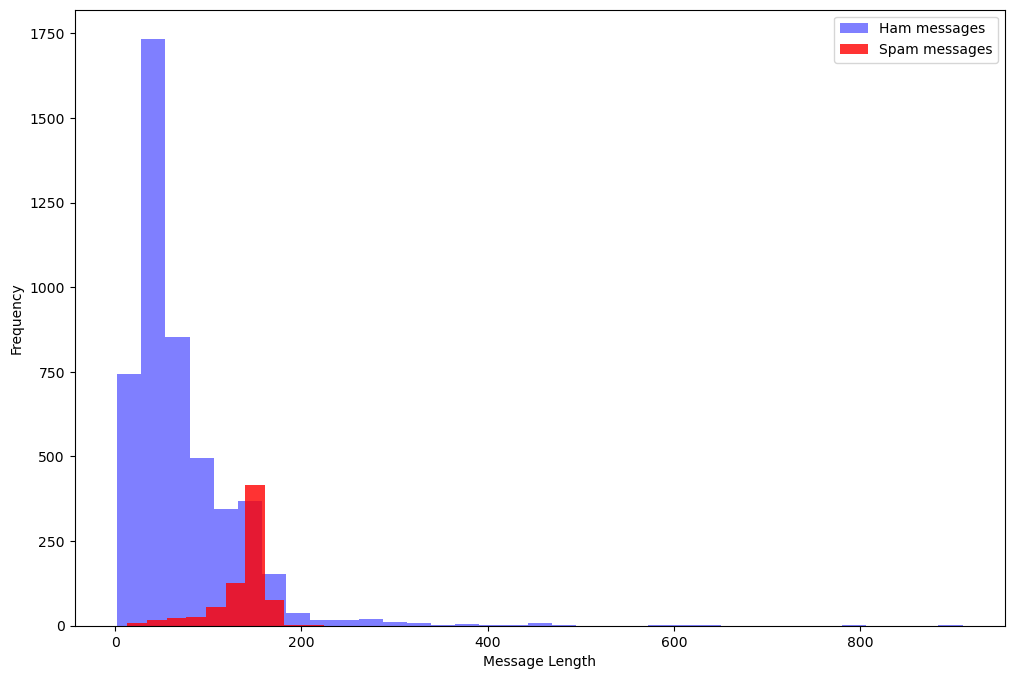

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))

df[df.label=='ham'].message_length.plot(bins=35, kind='hist', color='blue', 
                                       label='Ham messages', alpha=0.5)
df[df.label=='spam'].message_length.plot(kind='hist', color='red', 
                                       label='Spam messages', alpha=0.8)
plt.legend()
plt.xlabel("Message Length")

In [57]:
df[df.label=='ham'].describe()

,label_name,message_length
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [58]:
df[df.message_length == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [60]:
import  string 
from nltk.corpus  import stopwords

In [75]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    print("***************************************************")
    print(mess)
    print(type(mess))
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    print("Before",nopunc)
    print(type(nopunc))
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    print("After Join",nopunc)
    print("Type Check",type(nopunc))
    print("***************************************************")
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [76]:
df['clean_msg'] = df.message.apply(text_process)

***************************************************
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
<class 'str'>
Before ['G', 'o', ' ', 'u', 'n', 't', 'i', 'l', ' ', 'j', 'u', 'r', 'o', 'n', 'g', ' ', 'p', 'o', 'i', 'n', 't', ' ', 'c', 'r', 'a', 'z', 'y', ' ', 'A', 'v', 'a', 'i', 'l', 'a', 'b', 'l', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 'i', 'n', ' ', 'b', 'u', 'g', 'i', 's', ' ', 'n', ' ', 'g', 'r', 'e', 'a', 't', ' ', 'w', 'o', 'r', 'l', 'd', ' ', 'l', 'a', ' ', 'e', ' ', 'b', 'u', 'f', 'f', 'e', 't', ' ', 'C', 'i', 'n', 'e', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'g', 'o', 't', ' ', 'a', 'm', 'o', 'r', 'e', ' ', 'w', 'a', 't']
<class 'list'>
After Join Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat
Type Check <class 'str'>
***************************************************
***************************************************
Ok lar... Joking wif u oni...
<class 'str'>
Be

Before ['O', 'h', ' ', 'i', 's', ' ', 'i', 't', ' ', 'S', 'e', 'n', 'd', ' ', 'm', 'e', ' ', 't', 'h', 'e', ' ', 'a', 'd', 'd', 'r', 'e', 's', 's']
<class 'list'>
After Join Oh is it Send me the address
Type Check <class 'str'>
***************************************************
***************************************************
S'fine. Anytime. All the best with it.
<class 'str'>
Before ['S', 'f', 'i', 'n', 'e', ' ', 'A', 'n', 'y', 't', 'i', 'm', 'e', ' ', 'A', 'l', 'l', ' ', 't', 'h', 'e', ' ', 'b', 'e', 's', 't', ' ', 'w', 'i', 't', 'h', ' ', 'i', 't']
<class 'list'>
After Join Sfine Anytime All the best with it
Type Check <class 'str'>
***************************************************
***************************************************
That is wondar full flim.
<class 'str'>
Before ['T', 'h', 'a', 't', ' ', 'i', 's', ' ', 'w', 'o', 'n', 'd', 'a', 'r', ' ', 'f', 'u', 'l', 'l', ' ', 'f', 'l', 'i', 'm']
<class 'list'>
After Join That is wondar full flim
Type Check <class 'str'>
***

Before ['Y', 'e', 'a', 'h', ' ', 'j', 'a', 'y', 's', ' ', 's', 'o', 'r', 't', ' ', 'o', 'f', ' ', 'a', ' ', 'f', 'u', 'c', 'k', 'i', 'n', 'g', ' ', 'r', 'e', 't', 'a', 'r', 'd']
<class 'list'>
After Join Yeah jays sort of a fucking retard
Type Check <class 'str'>
***************************************************
***************************************************
Sorry, was in the bathroom, sup
<class 'str'>
Before ['S', 'o', 'r', 'r', 'y', ' ', 'w', 'a', 's', ' ', 'i', 'n', ' ', 't', 'h', 'e', ' ', 'b', 'a', 't', 'h', 'r', 'o', 'o', 'm', ' ', 's', 'u', 'p']
<class 'list'>
After Join Sorry was in the bathroom sup
Type Check <class 'str'>
***************************************************
***************************************************
Ur balance is now å£500. Ur next question is: Who sang 'Uptown Girl' in the 80's ? 2 answer txt ur ANSWER to 83600. Good luck!
<class 'str'>
Before ['U', 'r', ' ', 'b', 'a', 'l', 'a', 'n', 'c', 'e', ' ', 'i', 's', ' ', 'n', 'o', 'w', ' ', 'å', '£',

Before ['Y', 'a', ' ', 'i', 't', ' ', 'c', 'a', 'm', 'e', ' ', 'a', ' ', 'w', 'h', 'i', 'l', 'e', ' ', 'a', 'g', 'o']
<class 'list'>
After Join Ya it came a while ago
Type Check <class 'str'>
***************************************************
***************************************************
From tomorrow onwards eve 6 to 3 work.
<class 'str'>
Before ['F', 'r', 'o', 'm', ' ', 't', 'o', 'm', 'o', 'r', 'r', 'o', 'w', ' ', 'o', 'n', 'w', 'a', 'r', 'd', 's', ' ', 'e', 'v', 'e', ' ', '6', ' ', 't', 'o', ' ', '3', ' ', 'w', 'o', 'r', 'k']
<class 'list'>
After Join From tomorrow onwards eve 6 to 3 work
Type Check <class 'str'>
***************************************************
***************************************************
Anything lor but toa payoh got place 2 walk meh...
<class 'str'>
Before ['A', 'n', 'y', 't', 'h', 'i', 'n', 'g', ' ', 'l', 'o', 'r', ' ', 'b', 'u', 't', ' ', 't', 'o', 'a', ' ', 'p', 'a', 'y', 'o', 'h', ' ', 'g', 'o', 't', ' ', 'p', 'l', 'a', 'c', 'e', ' ', '2', ' 

Before ['I', 'm', ' ', 's', 'i', 'c', 'k', ' ', ' ', 'I', 'm', ' ', 'n', 'e', 'e', 'd', 'y', ' ', ' ', 'I', ' ', 'w', 'a', 'n', 't', ' ', 'y', 'o', 'u', ' ', ' ', 'p', 'o', 'u', 't', 's', ' ', 's', 't', 'o', 'm', 'p', 's', ' ', 'f', 'e', 'e', 't', ' ', 'W', 'h', 'e', 'r', 'e', ' ', 'a', 'r', 'e', ' ', 'y', 'o', 'u', ' ', ' ', 'p', 'o', 'u', 't', 's', ' ', 's', 't', 'o', 'm', 'p', 's', ' ', 'f', 'e', 'e', 't', ' ', 'I', ' ', 'w', 'a', 'n', 't', ' ', 'm', 'y', ' ', 's', 'l', 'a', 'v', 'e', ' ', ' ', 'I', ' ', 'w', 'a', 'n', 't', ' ', 'h', 'i', 'm', ' ', 'n', 'o', 'w', ' ']
<class 'list'>
After Join Im sick  Im needy  I want you  pouts stomps feet Where are you  pouts stomps feet I want my slave  I want him now 
Type Check <class 'str'>
***************************************************
***************************************************
* Am on a train back from northampton so i'm afraid not!
<class 'str'>
Before [' ', 'A', 'm', ' ', 'o', 'n', ' ', 'a', ' ', 't', 'r', 'a', 'i', 'n', ' '

Before [' ']
<class 'list'>
After Join  
Type Check <class 'str'>
***************************************************
***************************************************
Good afternon, my love. How are today? I hope your good and maybe have some interviews. I wake and miss you babe. A passionate kiss from across the sea
<class 'str'>
Before ['G', 'o', 'o', 'd', ' ', 'a', 'f', 't', 'e', 'r', 'n', 'o', 'n', ' ', 'm', 'y', ' ', 'l', 'o', 'v', 'e', ' ', 'H', 'o', 'w', ' ', 'a', 'r', 'e', ' ', 't', 'o', 'd', 'a', 'y', ' ', 'I', ' ', 'h', 'o', 'p', 'e', ' ', 'y', 'o', 'u', 'r', ' ', 'g', 'o', 'o', 'd', ' ', 'a', 'n', 'd', ' ', 'm', 'a', 'y', 'b', 'e', ' ', 'h', 'a', 'v', 'e', ' ', 's', 'o', 'm', 'e', ' ', 'i', 'n', 't', 'e', 'r', 'v', 'i', 'e', 'w', 's', ' ', 'I', ' ', 'w', 'a', 'k', 'e', ' ', 'a', 'n', 'd', ' ', 'm', 'i', 's', 's', ' ', 'y', 'o', 'u', ' ', 'b', 'a', 'b', 'e', ' ', 'A', ' ', 'p', 'a', 's', 's', 'i', 'o', 'n', 'a', 't', 'e', ' ', 'k', 'i', 's', 's', ' ', 'f', 'r', 'o', 'm', '

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [99]:
df

,label,message,label_name,message_length,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,Nah think goes usf lives around though
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1,161,2nd time tried contact å£750 Pound prize claim...
5568,ham,Will Ì_ b going to esplanade fr home?,0,37,Ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",0,57,Pity mood Soany suggestions
5570,ham,The guy did some bitching but I acted like i'd...,0,125,guy bitching acted like id interested buying s...


# Couting the most occuring Words

In [117]:
from collections import Counter

words = df[df.label=='ham'].clean_msg.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

[('get', 303), ('ltgt', 276), ('ok', 272), ('go', 247), ('ill', 236), ('know', 232), ('got', 231), ('like', 229), ('call', 229), ('come', 224), ('good', 222), ('time', 189), ('day', 187), ('love', 185), ('going', 167), ('want', 163), ('one', 162), ('home', 160), ('lor', 160), ('need', 156), ('sorry', 153), ('still', 146), ('see', 137), ('n', 134), ('later', 134), ('da', 131), ('r', 131), ('back', 129), ('think', 128), ('well', 126), ('today', 125), ('send', 123), ('tell', 121), ('cant', 118), ('ì', 117), ('hi', 117), ('take', 112), ('much', 112), ('oh', 111), ('night', 107), ('hey', 106), ('happy', 105), ('great', 100), ('way', 100), ('hope', 99), ('pls', 98), ('work', 96), ('wat', 95), ('thats', 94), ('dear', 94)]


In [122]:
wordsspam = df[df.label=='spam'].clean_msg.apply(lambda x:[word.lower() for word in x.split()])
spam_word = Counter()
for msg in wordsspam:
    spam_word.update(msg)
print(spam_word.most_common(50))

[('call', 347), ('free', 216), ('txt', 150), ('mobile', 123), ('text', 120), ('claim', 113), ('stop', 113), ('reply', 101), ('prize', 92), ('get', 83), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('cash', 62), ('win', 60), ('contact', 56), ('service', 55), ('please', 52), ('guaranteed', 50), ('customer', 49), ('16', 49), ('week', 49), ('tone', 48), ('per', 46), ('phone', 45), ('18', 43), ('chat', 42), ('awarded', 38), ('draw', 38), ('latest', 36), ('å£1000', 35), ('line', 35), ('150ppm', 34), ('mins', 34), ('receive', 33), ('camera', 33), ('1', 33), ('every', 33), ('message', 32), ('holiday', 32), ('landline', 32), ('shows', 31), ('å£2000', 31), ('go', 31), ('box', 30), ('number', 30), ('apply', 29), ('code', 29), ('live', 29)]


In [ ]:
ham_words = Counter()

for msg in words:
    ham_words.update(msg)
    
print(ham_words.most_common(50))

In [124]:
from sklearn.model_selection import train_test_split
X = df.clean_msg
y = df.label
print(X.shape)
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(5572,)
(4179,)
(1393,)
(4179,)
(1393,)


In [125]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [140]:
print((type(X_train_dtm),X_train_dtm.shape))

(<class 'scipy.sparse._csr.csr_matrix'>, (4179, 7996))


In [141]:
X_test_dtm = vect.transform(X_test)
print(type(X_test_dtm), X_test_dtm.shape)

<class 'scipy.sparse._csr.csr_matrix'> (1393, 7996)


In [142]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(X_train_dtm)
tu = tfidf_transformer.transform(X_train_dtm)

In [161]:
y_train

710      ham
3740    spam
2711     ham
3155     ham
3748    spam
        ... 
905      ham
5192     ham
3980     ham
235      ham
5157     ham
Name: label, Length: 4179, dtype: object

In [162]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [163]:
%time nb.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 18 ms


MultinomialNB()

In [164]:
from sklearn import metrics

# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
metrics.confusion_matrix(y_test, y_pred_class)

=======Accuracy Score===========
0.9827709978463748
=======Confision Matrix===========


array([[1205,    8],
       [  16,  164]], dtype=int64)

In [165]:
# print message text for false positives (ham incorrectly classifier)
# X_test[(y_pred_class==1) & (y_test==0)]
X_test[y_pred_class > y_test]

2418    Madamregret disturbancemight receive reference...
4598                                laid airtel line rest
386                                   Customer place call
1289    HeyGreat dealFarm tour 9am 5pm 95pax 50 deposi...
5094    Hi ShanilRakhesh herethanksi exchanged uncut d...
494                                      free nowcan call
759     Call youcarlos isare phones vibrate acting mig...
3140                                  Customer place call
Name: clean_msg, dtype: object

In [166]:
# print message text for false negatives (spam incorrectly classifier)
X_test[y_pred_class < y_test]

4674    Hi babe Chloe r smashed saturday night great w...
3528    Xmas New Years Eve tickets sale club day 10am ...
3417    LIFE never much fun great came made truly spec...
2773    come takes little time child afraid dark becom...
1960    Guess Somebody know secretly fancies Wanna fin...
5       FreeMsg Hey darling 3 weeks word back Id like ...
2078                         85233 FREERingtoneReply REAL
1457    CLAIRE havin borin time alone wanna cum 2nite ...
190     unique enough Find 30th August wwwareyouunique...
2429    Guess IThis first time created web page WWWASJ...
3057    unsubscribed services Get tons sexy babes hunk...
1021    Guess Somebody know secretly fancies Wanna fin...
4067    TBSPERSOLVO chasing us since Sept forå£38 defi...
3358         Sorry missed call lets talk time 07090201529
2821    ROMCAPspam Everyone around responding well pre...
2247    Back work 2morro half term C 2nite sexy passio...
Name: clean_msg, dtype: object

In [167]:
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([2.11903975e-02, 3.97831612e-04, 1.06470895e-03, ...,
       1.31939653e-02, 9.99821127e-05, 6.04083365e-06])

In [168]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

0.9774342768159751

In [170]:
# import an instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

CPU times: total: 0 ns
Wall time: 36.3 ms


LogisticRegression(solver='liblinear')

In [171]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([0.01694418, 0.0152182 , 0.08261755, ..., 0.02198942, 0.00531726,
       0.00679188])

In [172]:
# calculate accuracy of class predictions
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred_class))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred_class))

# calculate AUC
print("=======ROC AUC Score===========")
print(metrics.roc_auc_score(y_test, y_pred_prob))

=======Accuracy Score===========
0.9842067480258435
=======Confision Matrix===========
[[1213    0]
 [  22  158]]
=======ROC AUC Score===========
0.9835714940001832
